In [2]:
import pandas as pd



In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

In [83]:
df2 = pd.read_csv('Data_Train.csv')

In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In [85]:
df2.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [86]:
df2.shape

(10683, 11)

In [87]:
df2.isnull().mean()*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [88]:
df2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [89]:
df2.dropna(inplace=True)

In [90]:
df2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

**Data cleaning**

In [91]:
df2.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [92]:
df2['Date_of_Journey']= pd.to_datetime(df2['Date_of_Journey'])

<ipython-input-92-1999a4bcd467>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date_of_Journey']= pd.to_datetime(df2['Date_of_Journey'])


In [93]:
df2.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [94]:
df2['Dep_Time'] = pd.to_datetime(df2['Dep_Time'])

<ipython-input-94-0ed616d7dc6e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Dep_Time'] = pd.to_datetime(df2['Dep_Time'])


In [95]:
df2['Arrival_Time'] = pd.to_datetime(df2['Arrival_Time'])

<ipython-input-95-e3c734420b86>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Arrival_Time'] = pd.to_datetime(df2['Arrival_Time'])


In [96]:
df2.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [97]:
df2['Journey_day'] =df2['Date_of_Journey'].dt.day
df2['Journey_month'] = df2['Date_of_Journey'].dt.month

In [98]:
df2.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-08-01 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-08-01 05:50:00,2023-08-01 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-08-01 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-08-01 18:05:00,2023-08-01 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-08-01 16:50:00,2023-08-01 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [99]:
df2.drop('Date_of_Journey',axis=1,inplace=True)

In [100]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Source           10682 non-null  object        
 2   Destination      10682 non-null  object        
 3   Route            10682 non-null  object        
 4   Dep_Time         10682 non-null  datetime64[ns]
 5   Arrival_Time     10682 non-null  datetime64[ns]
 6   Duration         10682 non-null  object        
 7   Total_Stops      10682 non-null  object        
 8   Additional_Info  10682 non-null  object        
 9   Price            10682 non-null  int64         
 10  Journey_day      10682 non-null  int32         
 11  Journey_month    10682 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(1), object(7)
memory usage: 709.4+ KB


In [101]:
df2['Arrival_Time_hour'] = df2['Arrival_Time'].dt.hour
df2['Arrival_Time_min'] = df2['Arrival_Time'].dt.minute


In [102]:
df2.drop('Arrival_Time',axis=1,inplace=True)

In [103]:
df2['Dep_Time_hour'] = df2['Dep_Time'].dt.hour
df2['Dep_Time_min']  = df2['Dep_Time'].dt.minute

In [104]:
df2.drop('Dep_Time',axis=1,inplace=True)

In [105]:
df2['Arrival_Time_hour']

0         1
1        13
2         4
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_Time_hour, Length: 10682, dtype: int32

In [106]:
df2['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [107]:
df2.dtypes

Airline              object
Source               object
Destination          object
Route                object
Duration             object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int32
Journey_month         int32
Arrival_Time_hour     int32
Arrival_Time_min      int32
Dep_Time_hour         int32
Dep_Time_min          int32
dtype: object

In [108]:
df2.dtypes

Airline              object
Source               object
Destination          object
Route                object
Duration             object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int32
Journey_month         int32
Arrival_Time_hour     int32
Arrival_Time_min      int32
Dep_Time_hour         int32
Dep_Time_min          int32
dtype: object

In [109]:
duration = list(df2['Duration'])

In [110]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + '0m'
        else:
            duration[i] = '0h' + duration[i]
            


In [111]:
df2['Duration']= duration

In [112]:
df2['Duration']

0        2h 50m
1        7h 25m
2         19h0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680      3h0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [113]:
df2['Duration_hour'] = df2['Duration'].apply(lambda x: x.split(' ')[0][0:-1])


In [114]:
df2.drop('Duration_hour',axis=1,inplace=True)

In [115]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [116]:
def hours(value):
    parts = value.split('h')
    if len(parts) == 2 and parts[0].isdigit() and parts[1].isdigit():
        return int(parts[0])
    else:
        return 0  # Return 0 for invalid or missing data

df2['dur_hour'] = df2['Duration'].apply(hours)


In [117]:
df2.dtypes

Airline              object
Source               object
Destination          object
Route                object
Duration             object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int32
Journey_month         int32
Arrival_Time_hour     int32
Arrival_Time_min      int32
Dep_Time_hour         int32
Dep_Time_min          int32
dur_hour              int64
dtype: object

In [118]:
def minutes(x):
    parts = x.split(' ')
    if len(parts) > 1:
        return int(parts[1][0:-1])
    else:
        return 0  # Return 0 if minutes are not specified in the duration

df2['Duration_minutes'] = df2['Duration'].apply(minutes)


In [119]:
df2['Duration_minutes']

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_minutes, Length: 10682, dtype: int64

In [120]:

df2.dtypes

Airline              object
Source               object
Destination          object
Route                object
Duration             object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int32
Journey_month         int32
Arrival_Time_hour     int32
Arrival_Time_min      int32
Dep_Time_hour         int32
Dep_Time_min          int32
dur_hour              int64
Duration_minutes      int64
dtype: object

In [121]:
df2.drop('Duration',axis=1,inplace=True)

In [122]:
column=[column for column in df2.columns if df2[column].dtype=='object']

In [123]:
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [124]:
continious_col = [column for column in df2.columns if  df2[column].dtype != 'object']

In [125]:
continious_col

['Price',
 'Journey_day',
 'Journey_month',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Dep_Time_hour',
 'Dep_Time_min',
 'dur_hour',
 'Duration_minutes']

# handling categorical data

In [126]:
categorical = df2[column]

In [127]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [128]:
categorical['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

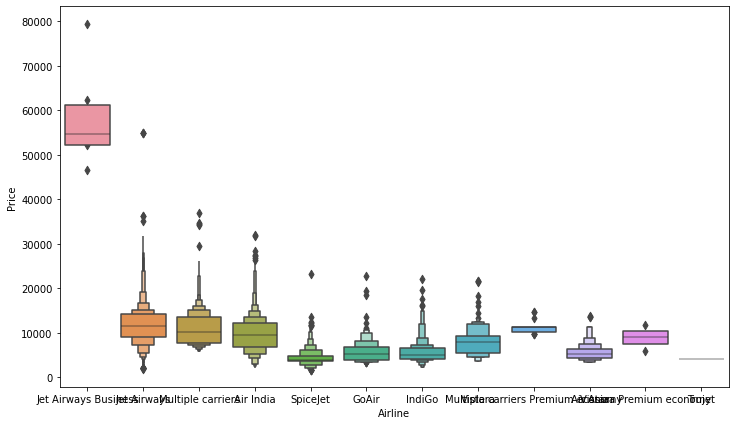

In [129]:
plt.figure(figsize=(12,7))
sns.boxenplot(x='Airline',y='Price',data=df2.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

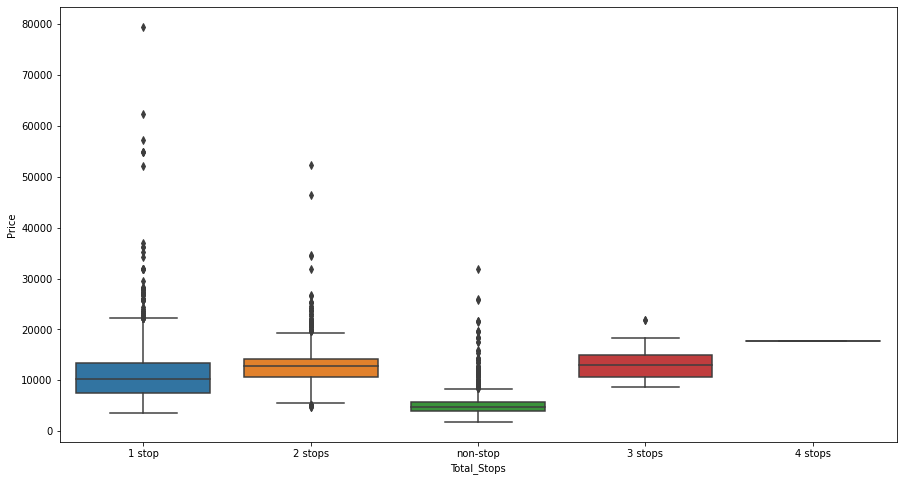

In [132]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df2.sort_values('Price',ascending=False))

In [133]:
Airline = pd.get_dummies(categorical['Airline'],drop_first=True)

In [134]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [135]:
categorical['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

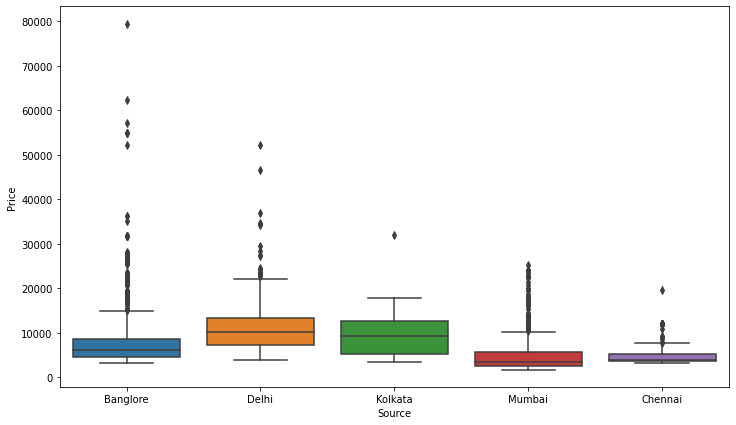

In [136]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Source',y='Price',data=df2.sort_values('Price',ascending=False))

<Figure size 1080x1080 with 0 Axes>

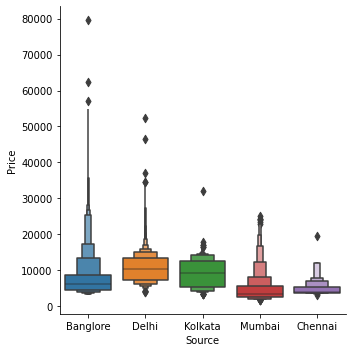

In [137]:
plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df2.sort_values('Price',ascending=False),kind='boxen')

In [138]:
source = pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [139]:
categorical['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

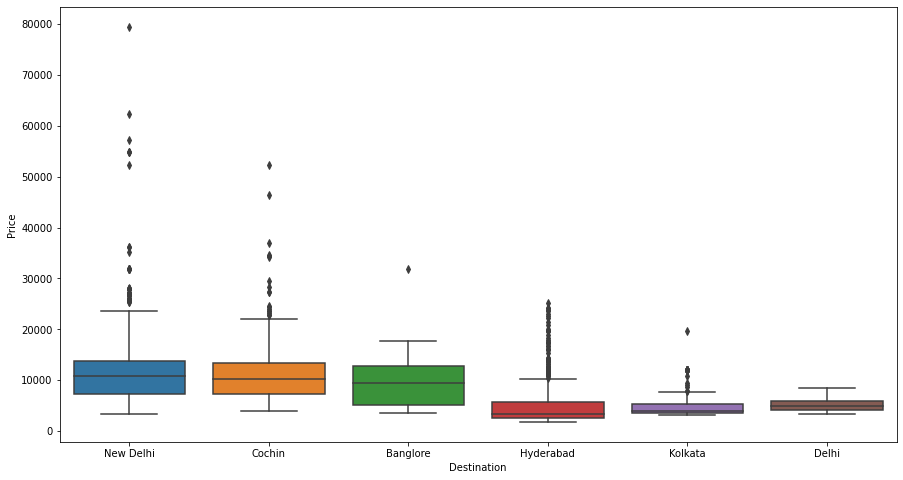

In [141]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df2.sort_values('Price',ascending=False))

In [142]:
destination = pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [143]:
categorical['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [144]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

<ipython-input-144-1996374604a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route1']=categorical['Route'].str.split('→').str[0]
<ipython-input-144-1996374604a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route2']=categorical['Route'].str.split('→').str[1]
<ipython-input-144-1996374604a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [145]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [147]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [146]:
categorical.drop('Route',axis=1,inplace=True)

<ipython-input-146-355abec33017>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical.drop('Route',axis=1,inplace=True)


In [148]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [149]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [150]:
for i in ['Route3','Route4','Route5']:
    categorical[i].fillna('None',inplace=True)

<ipython-input-150-e4272d896c5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i].fillna('None',inplace=True)


In [151]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [152]:
from sklearn.preprocessing import  LabelEncoder
encoder = LabelEncoder()

In [153]:
for i in ['Route1','Route2','Route3','Route4','Route5']:
    categorical[i] = encoder.fit_transform(categorical[i])


<ipython-input-153-e50a3f191e7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = encoder.fit_transform(categorical[i])


In [154]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [156]:
categorical['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [157]:
categorical.drop('Additional_Info',axis=1,inplace=True)

<ipython-input-157-d62cdeb7b8a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical.drop('Additional_Info',axis=1,inplace=True)


In [158]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [159]:
categorical['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [160]:
categorical['Total_Stops']= categorical['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

<ipython-input-160-45c6ef0b9d06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']= categorical['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})


In [161]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [162]:
categorical.drop('Airline',axis=1,inplace=True)
categorical.drop('Source',axis=1,inplace=True)




<ipython-input-162-e7dcf56f4a32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical.drop('Airline',axis=1,inplace=True)
<ipython-input-162-e7dcf56f4a32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical.drop('Source',axis=1,inplace=True)


In [163]:
categorical.drop('Destination',axis=1,inplace=True)

<ipython-input-163-5365900e9f4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical.drop('Destination',axis=1,inplace=True)


In [164]:
categorical.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,0,0,13,29,13,5
1,2,2,25,1,3,5
2,2,3,32,4,5,5
3,1,2,34,3,13,5
4,1,0,34,8,13,5


In [165]:
new_df = pd.concat([categorical,Airline,source,destination,df2[continious_col]],axis=1)

In [154]:
new_df

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,dur_hour,Duration_minutes
0,0,0,13,29,13,5,False,False,True,False,...,True,3897,24,3,1,10,22,20,0,50
1,2,2,25,1,3,5,True,False,False,False,...,False,7662,1,5,13,15,5,50,0,25
2,2,3,32,4,5,5,False,False,False,True,...,False,13882,9,6,4,25,9,25,19,0
3,1,2,34,3,13,5,False,False,True,False,...,False,6218,12,5,23,30,18,5,0,25
4,1,0,34,8,13,5,False,False,True,False,...,True,13302,1,3,21,35,16,50,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,False,False,False,False,...,False,4107,9,4,22,25,19,55,0,30
10679,0,2,5,29,13,5,True,False,False,False,...,False,4145,27,4,23,20,20,45,0,35
10680,0,0,13,29,13,5,False,False,False,True,...,False,7229,27,4,11,20,8,20,3,0
10681,0,0,13,29,13,5,False,False,False,False,...,True,12648,1,3,14,10,11,30,0,40


In [166]:
new_df.head(20)

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,dur_hour,Duration_minutes
0,0,0,13,29,13,5,False,False,True,False,...,True,3897,24,3,1,10,22,20,0,50
1,2,2,25,1,3,5,True,False,False,False,...,False,7662,1,5,13,15,5,50,0,25
2,2,3,32,4,5,5,False,False,False,True,...,False,13882,9,6,4,25,9,25,0,0
3,1,2,34,3,13,5,False,False,True,False,...,False,6218,12,5,23,30,18,5,0,25
4,1,0,34,8,13,5,False,False,True,False,...,True,13302,1,3,21,35,16,50,0,45
5,0,2,5,29,13,5,False,False,False,False,...,False,3873,24,6,11,25,9,0,0,25
6,1,0,7,8,13,5,False,False,False,True,...,True,11087,12,3,10,25,18,55,0,30
7,1,0,7,8,13,5,False,False,False,True,...,True,22270,1,3,5,5,8,0,0,5
8,1,0,7,8,13,5,False,False,False,True,...,True,11087,12,3,10,25,8,55,0,30
9,1,3,7,6,13,5,False,False,False,False,...,False,8625,27,5,19,15,11,25,0,50


In [167]:
new_df['Price'] = new_df['Price'].astype(int)

In [168]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.displot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

C:\Users\amit\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


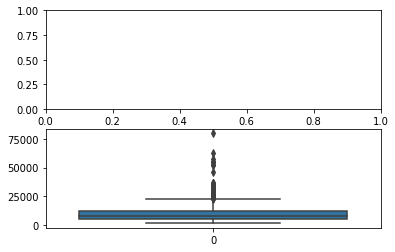

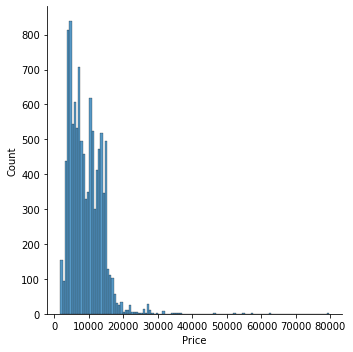

In [167]:
plot(new_df,'Price')

In [169]:
new_df['Price']=np.where(new_df['Price']>=40000,new_df['Price'].median(),new_df['Price'])

C:\Users\amit\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


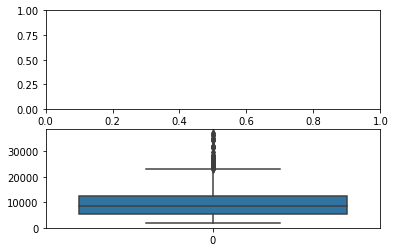

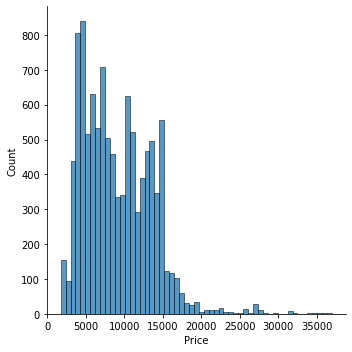

In [170]:
plot(new_df,'Price')

In [201]:
new_df.drop('Route1',axis=1,inplace=True)
new_df.drop('Route2',axis=1,inplace=True)
new_df.drop('Route3',axis=1,inplace=True)
new_df.drop('Route4',axis=1,inplace=True)
new_df.drop('Route5',axis=1,inplace=True)

In [202]:
new_df.sample(5)

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,New Delhi,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,dur_hour,Duration_minutes
310,1,False,False,False,True,False,False,False,False,False,...,False,10844.0,21,5,19,50,20,0,0,50
3041,2,True,False,False,False,False,False,False,False,False,...,False,11432.0,9,5,20,25,8,20,0,5
9372,1,False,False,False,True,False,False,False,False,False,...,True,22270.0,1,3,5,5,11,40,0,25
10110,1,False,False,False,False,False,True,False,False,False,...,False,7564.0,18,5,19,15,4,55,0,20
844,0,True,False,False,False,False,False,False,False,False,...,False,3625.0,24,5,20,45,19,30,0,15


**Model Training**

In [203]:
X = new_df.drop('Price',axis=1)
y = new_df['Price']

In [172]:
from sklearn.feature_selection import mutual_info_classif

In [173]:
mutual_info_classif(X,y)

array([2.15768017, 2.00037907, 2.81713891, 2.29940096, 1.48924498,
       0.7123514 , 0.75805901, 0.10745956, 0.66927528, 0.91984132,
       0.00817086, 0.56751451, 0.01059372, 0.31378678, 0.        ,
       0.24079736, 0.01077926, 0.19033101, 1.54567398, 0.88932662,
       0.28635009, 1.54227312, 0.40922519, 0.28759326, 0.17302643,
       0.35590661, 0.80129235, 1.20552728, 1.83555345, 1.54817851,
       1.42686913, 1.19576649, 0.2396385 , 1.08556463])

In [174]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.136442
Route1,2.084643
Route2,2.767907
Route3,2.314029
Route4,1.504921
Route5,0.764810
Air India,0.743864
GoAir,0.103252
IndiGo,0.671054
Jet Airways,0.917902


In [204]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=100)

In [205]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [206]:
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [208]:
predict(LinearRegression())

Model is: LinearRegression()
Training score: 0.6112945547193387
Predictions are: [ 7047.03125 10970.5625  13303.0625  ... 10589.      14120.90625
 11885.03125]


r2 score is: 0.6088278180483441
MAE:1960.2805919513337
MSE:7272331.941933603
RMSE:2696.7261525660338


In [176]:
predict(LogisticRegression())

Model is: LogisticRegression()


C:\Users\amit\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score: 0.3277940315974254
Predictions are: [14714. 13587. 14300. ... 12898. 11087. 15237.]


r2 score is: 0.43174870841434776
MAE:2000.9279363593823
MSE:10564432.261581657
RMSE:3250.297257418413


In [209]:
predict(DecisionTreeClassifier())

Model is: DecisionTreeClassifier()
Training score: 0.8799297834991223
Predictions are: [ 6253.  7408. 12819. ... 12898. 13817. 15237.]


r2 score is: 0.6920965896463939
MAE:1365.824988301357
MSE:5724271.585400093
RMSE:2392.545001750248


In [210]:
from sklearn.ensemble import RandomForestRegressor

In [211]:
predict(RandomForestRegressor())

Model is: RandomForestRegressor()
Training score: 0.9537322652436662
Predictions are: [ 7664.87        9070.24       12552.37109524 ... 13924.1285
 12380.805      14395.44      ]


r2 score is: 0.8106549651080861
MAE:1175.3926666003497
MSE:3520137.7010525144
RMSE:1876.20300102428


In [212]:
import pickle

In [213]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=100)

In [214]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [216]:
y_pred = reg.predict(X_test)

In [217]:
y_pred.shape

(2137,)

In [218]:
r2_score(y_test,y_pred)

0.8095126101042529

In [219]:
reg.score(X_train,y_train)

0.9533660563252726

In [220]:
reg.score(X_test,y_test)

0.8095126101042529

In [221]:
import pickle

In [225]:
pickle.dump(reg,open('flight_prediction Model.pkl','wb'))

In [223]:
X_train.shape

(8545, 29)

In [224]:
X_test.shape

(2137, 29)

In [219]:
df1

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,dur_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,0,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,0,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,0,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,22,25,19,55,0,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,23,20,20,45,0,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,14,10,11,30,0,40


In [193]:
new_df.dtypes

Total_Stops                            int64
Route1                                 int32
Route2                                 int32
Route3                                 int32
Route4                                 int32
Route5                                 int32
Air India                               bool
GoAir                                   bool
IndiGo                                  bool
Jet Airways                             bool
Jet Airways Business                    bool
Multiple carriers                       bool
Multiple carriers Premium economy       bool
SpiceJet                                bool
Trujet                                  bool
Vistara                                 bool
Vistara Premium economy                 bool
Chennai                                 bool
Delhi                                   bool
Kolkata                                 bool
Mumbai                                  bool
Cochin                                  bool
Delhi     

In [194]:
new_df.shape

(10682, 35)

In [195]:
new_df.columns

Index(['Total_Stops', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Price', 'Journey_day', 'Journey_month',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Dep_Time_hour',
       'Dep_Time_min', 'dur_hour', 'Duration_minutes'],
      dtype='object')

In [197]:
new_df['Route1']

0        0
1        2
2        3
3        2
4        0
        ..
10678    2
10679    2
10680    0
10681    0
10682    3
Name: Route1, Length: 10682, dtype: int32

In [199]:
df2['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64